In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
size = 1500
lats = np.random.uniform(low=-90.000, high=90.000, size=size)
lngs = np.random.uniform(low=-180.000, high=180.000, size=size)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
#for i in range(len(cities)):
#    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#        time.sleep(60)
    # Create endpoint URL with each city.
#    city_url = url + "&q=" + cities[i]

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | sao miguel do araguaia
Processing Record 3 of Set 1 | les cayes
Processing Record 4 of Set 1 | ludvika
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | klaksvik
Processing Record 10 of Set 1 | sistranda
Processing Record 11 of Set 1 | monrovia
Processing Record 12 of Set 1 | zachagansk
City not found. Skipping...
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | nador
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | lemesos
City not found. Skipping...
Processing Record 17 of Set 1 | boa vista
Processing Record 18 of Set 1 | lavrentiya
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | pevek
Processing Record 21 of Set 1 | mananara
Processing Record 22 of Set 1 | vaini
Processing Record 23 of Set 1 | taolan

Processing Record 42 of Set 4 | mrirt
City not found. Skipping...
Processing Record 43 of Set 4 | republic
Processing Record 44 of Set 4 | bad munstereifel
Processing Record 45 of Set 4 | honiara
Processing Record 46 of Set 4 | denau
City not found. Skipping...
Processing Record 47 of Set 4 | eureka
Processing Record 48 of Set 4 | leningradskiy
Processing Record 49 of Set 4 | aykino
Processing Record 50 of Set 4 | avera
Processing Record 1 of Set 5 | lolua
City not found. Skipping...
Processing Record 2 of Set 5 | joshimath
Processing Record 3 of Set 5 | coihaique
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 5 | utiroa
City not found. Skipping...
Processing Record 7 of Set 5 | eirunepe
Processing Record 8 of Set 5 | kokopo
Processing Record 9 of Set 5 | cairns
Processing Record 10 of Set 5 | qaqortoq
Processing Record 11 of Set 5 | avarua
Processing Record 12 of Set 5 | tuktoyaktuk
Processi

Processing Record 33 of Set 8 | tete
Processing Record 34 of Set 8 | nantucket
Processing Record 35 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 36 of Set 8 | tual
Processing Record 37 of Set 8 | trincomalee
Processing Record 38 of Set 8 | gulshat
City not found. Skipping...
Processing Record 39 of Set 8 | lazaro cardenas
Processing Record 40 of Set 8 | fethiye
Processing Record 41 of Set 8 | mayo
Processing Record 42 of Set 8 | amantea
Processing Record 43 of Set 8 | tocopilla
Processing Record 44 of Set 8 | darab
Processing Record 45 of Set 8 | nushki
Processing Record 46 of Set 8 | otradnoye
Processing Record 47 of Set 8 | nabire
Processing Record 48 of Set 8 | coquimbo
Processing Record 49 of Set 8 | kholtoson
Processing Record 50 of Set 8 | sorland
Processing Record 1 of Set 9 | bonwapitse
Processing Record 2 of Set 9 | korla
Processing Record 3 of Set 9 | the valley
Processing Record 4 of Set 9 | mount isa
Processing Record 5 of Set 9 | valdivia
Processi

Processing Record 19 of Set 12 | payakumbuh
Processing Record 20 of Set 12 | salalah
Processing Record 21 of Set 12 | bossembele
City not found. Skipping...
Processing Record 22 of Set 12 | khormuj
City not found. Skipping...
Processing Record 23 of Set 12 | tuatapere
Processing Record 24 of Set 12 | natal
Processing Record 25 of Set 12 | rancho palos verdes
Processing Record 26 of Set 12 | ambovombe
Processing Record 27 of Set 12 | gazli
Processing Record 28 of Set 12 | kaeo
Processing Record 29 of Set 12 | quelimane
Processing Record 30 of Set 12 | mahibadhoo
Processing Record 31 of Set 12 | sangar
Processing Record 32 of Set 12 | balaogan
Processing Record 33 of Set 12 | flinders
Processing Record 34 of Set 12 | codrington
Processing Record 35 of Set 12 | cockburn town
Processing Record 36 of Set 12 | iquique
Processing Record 37 of Set 12 | batemans bay
Processing Record 38 of Set 12 | najran
Processing Record 39 of Set 12 | talesh
City not found. Skipping...
Processing Record 40 o

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lompoc,34.6391,-120.4579,70.84,79,40,12.66,US,2022-06-04 18:54:26
1,Sao Miguel Do Araguaia,-13.2750,-50.1628,94.66,18,13,6.55,BR,2022-06-04 18:54:26
2,Les Cayes,18.2000,-73.7500,83.46,73,100,13.62,HT,2022-06-04 18:54:27
3,Ludvika,60.1496,15.1878,62.60,64,86,3.76,SE,2022-06-04 18:54:27
4,Port Alfred,-33.5906,26.8910,57.18,90,99,3.00,ZA,2022-06-04 18:54:27
5,Ribeira Grande,38.5167,-28.7000,66.60,94,75,18.41,PT,2022-06-04 18:54:27
6,Rikitea,-23.1203,-134.9692,75.67,74,100,9.69,PF,2022-06-04 18:54:28
7,Sitka,57.0531,-135.3300,55.29,76,100,23.02,US,2022-06-04 18:54:28
8,Klaksvik,62.2266,-6.5890,49.12,86,100,7.43,FO,2022-06-04 18:54:28
9,Sistranda,63.7256,8.8340,48.16,89,100,34.99,NO,2022-06-04 18:54:29


In [12]:
# Reorder columns
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lompoc,US,2022-06-04 18:54:26,34.6391,-120.4579,70.84,79,40,12.66
1,Sao Miguel Do Araguaia,BR,2022-06-04 18:54:26,-13.2750,-50.1628,94.66,18,13,6.55
2,Les Cayes,HT,2022-06-04 18:54:27,18.2000,-73.7500,83.46,73,100,13.62
3,Ludvika,SE,2022-06-04 18:54:27,60.1496,15.1878,62.60,64,86,3.76
4,Port Alfred,ZA,2022-06-04 18:54:27,-33.5906,26.8910,57.18,90,99,3.00
5,Ribeira Grande,PT,2022-06-04 18:54:27,38.5167,-28.7000,66.60,94,75,18.41
6,Rikitea,PF,2022-06-04 18:54:28,-23.1203,-134.9692,75.67,74,100,9.69
7,Sitka,US,2022-06-04 18:54:28,57.0531,-135.3300,55.29,76,100,23.02
8,Klaksvik,FO,2022-06-04 18:54:28,62.2266,-6.5890,49.12,86,100,7.43
9,Sistranda,NO,2022-06-04 18:54:29,63.7256,8.8340,48.16,89,100,34.99


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1654369758.792174

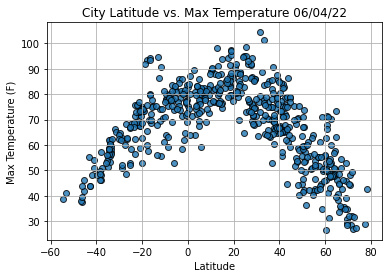

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

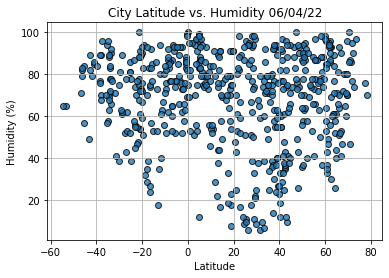

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

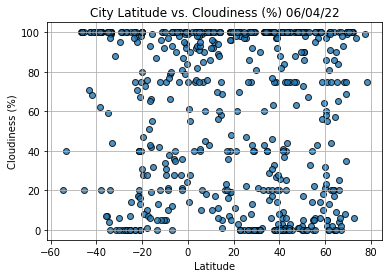

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

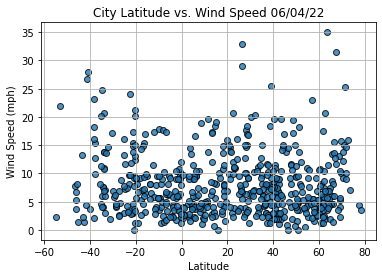

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                         Chuy
Country                        UY
Date          2022-06-04 18:51:11
Lat                      -33.6971
Lng                      -53.4616
Max Temp                    58.42
Humidity                       66
Cloudiness                    100
Wind Speed                  10.92
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
560     True
561     True
562    False
563     True
564     True
Name: Lat, Length: 565, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lompoc,US,2022-06-04 18:54:26,34.6391,-120.4579,70.84,79,40,12.66
2,Les Cayes,HT,2022-06-04 18:54:27,18.2000,-73.7500,83.46,73,100,13.62
3,Ludvika,SE,2022-06-04 18:54:27,60.1496,15.1878,62.60,64,86,3.76
5,Ribeira Grande,PT,2022-06-04 18:54:27,38.5167,-28.7000,66.60,94,75,18.41
7,Sitka,US,2022-06-04 18:54:28,57.0531,-135.3300,55.29,76,100,23.02


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

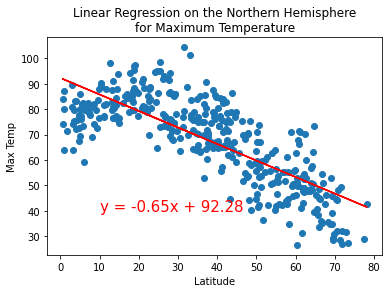

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature',
                       'Max Temp',(10,40))

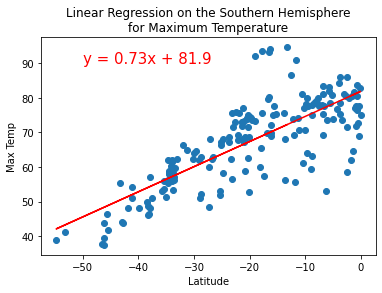

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 
                       'Max Temp',(-50,90))

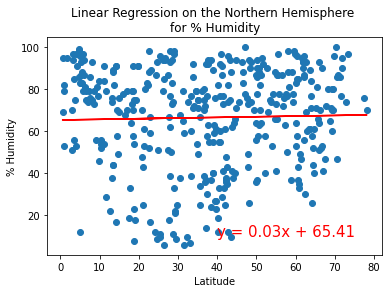

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity',
                       '% Humidity',(40,10))

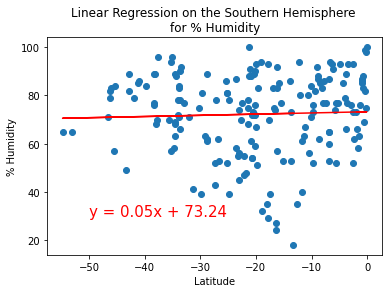

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity',
                       '% Humidity',(-50,30))

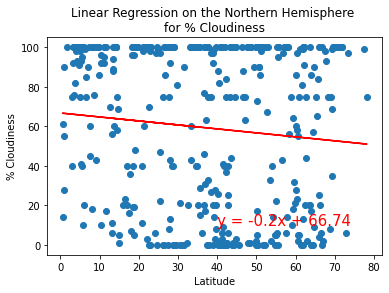

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness',
                       '% Cloudiness',(40,10))

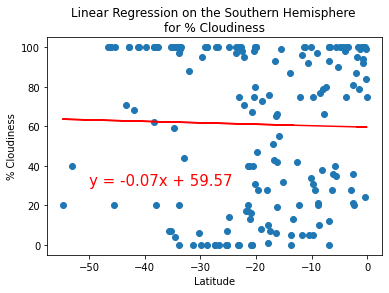

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness',
                       '% Cloudiness',(-50,30))

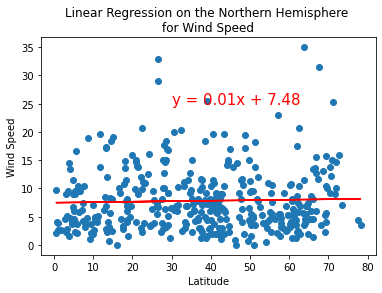

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 
                       'Wind Speed',(30,25))

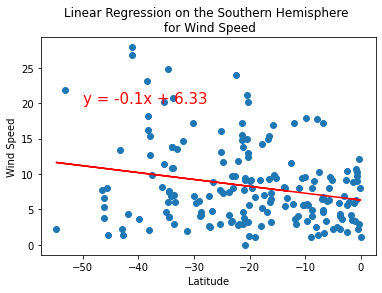

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed',(-50,20))